In [14]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [69]:

iris = datasets.load_iris()
df = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
df.reset_index(inplace=True)

In [85]:
df.head()

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [88]:
x=df.values[:,1:4]
y=df.values[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [71]:
clf=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)

clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [72]:
y_pred=clf.predict(x_test)

In [73]:
print(y_pred)

[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]


In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print("Report:",classification_report(y_test,y_pred))


Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



|--- feature_2 <= 2.45
|   |--- class: 0.0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_0 <= 5.15
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  5.15
|   |   |   |--- class: 1.0
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2.0



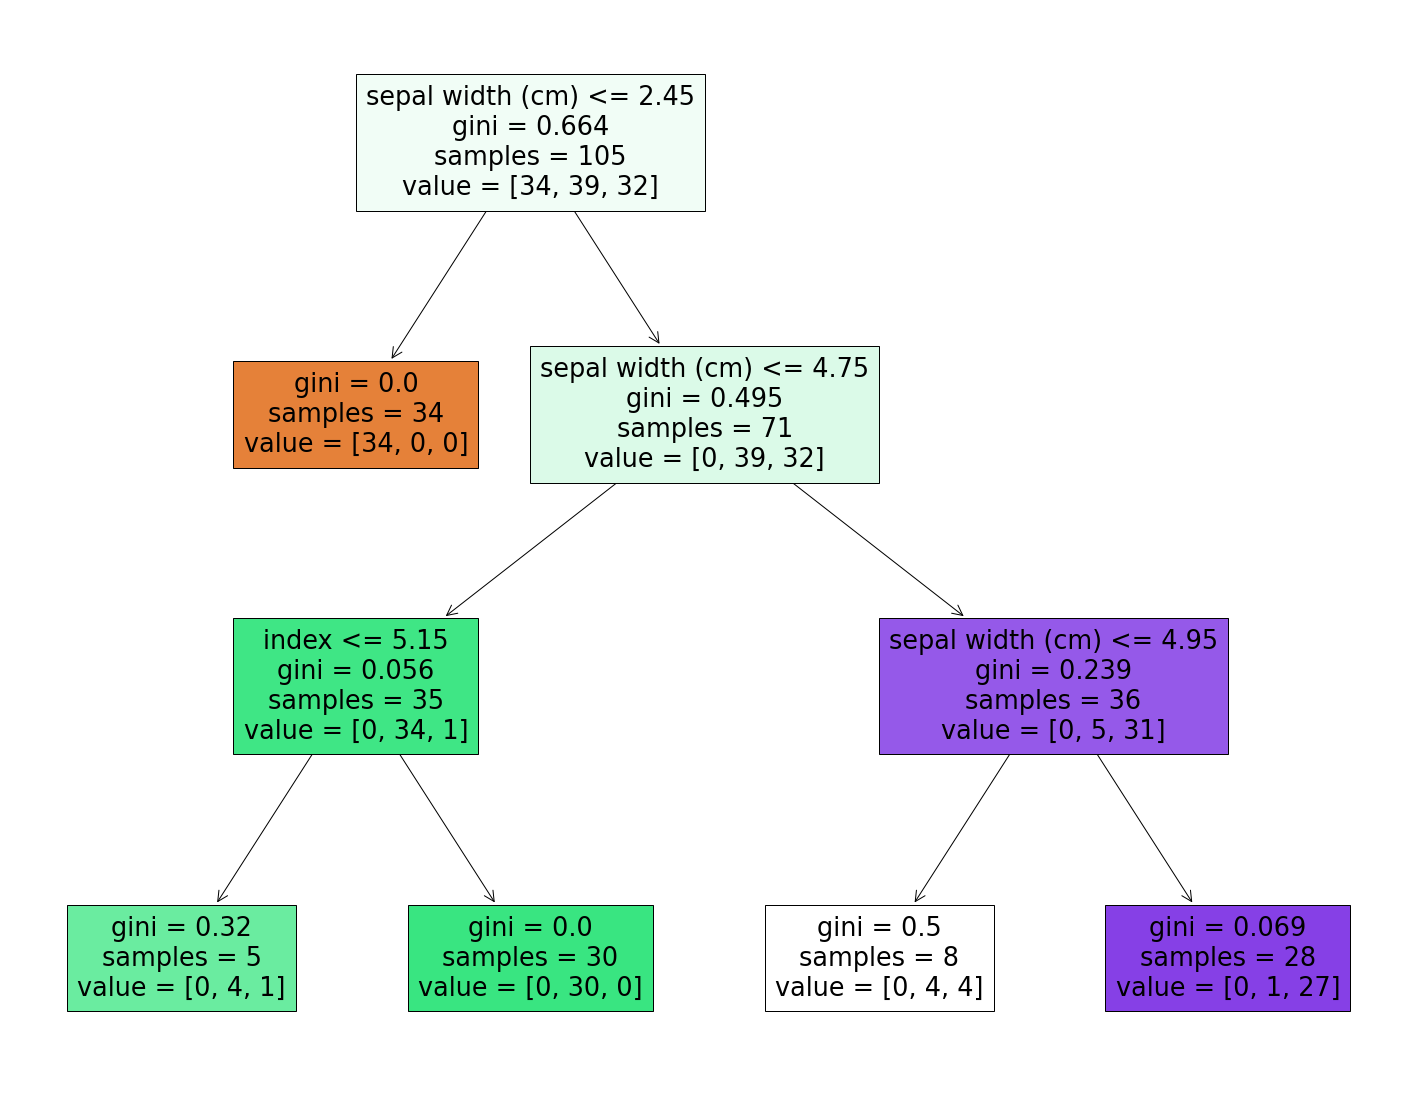

In [86]:
from sklearn import tree
from matplotlib import pyplot as plt

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns,  
                   filled=True)